In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import pickle
import unicodedata
import emoji
from sys import argv
from time import time,sleep
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk import RegexpTokenizer

import geopandas as gpd
import descartes

import urlmarker
from html import unescape

In [53]:
df=pd.read_csv('cleanTweets_pred_prob_BJP_CONG.csv',na_values={'None','NONE'})

df=df.replace(r'^\s*$', np.nan, regex=True)
df=df.fillna('')

In [37]:
df_bjp=df.loc[df.index[df['bjp']==1]].copy()
df_congress=df.loc[df.index[df['congress']==1]].copy()

df_bjp=df_bjp.reset_index(drop=True)
df_congress=df_congress.reset_index(drop=True)

In [54]:
d=df
d_pos=d.loc[d.index[d['pred']=='pos']]
d_neg=d.loc[d.index[d['pred']=='neg']]
d_neu=d.loc[d.index[d['pred']=='neu']]

In [49]:
print(len(df_congress))
print(len(d_pos))
print(len(d_neg))
print(len(d_neu))

78975
10598
59838
8539


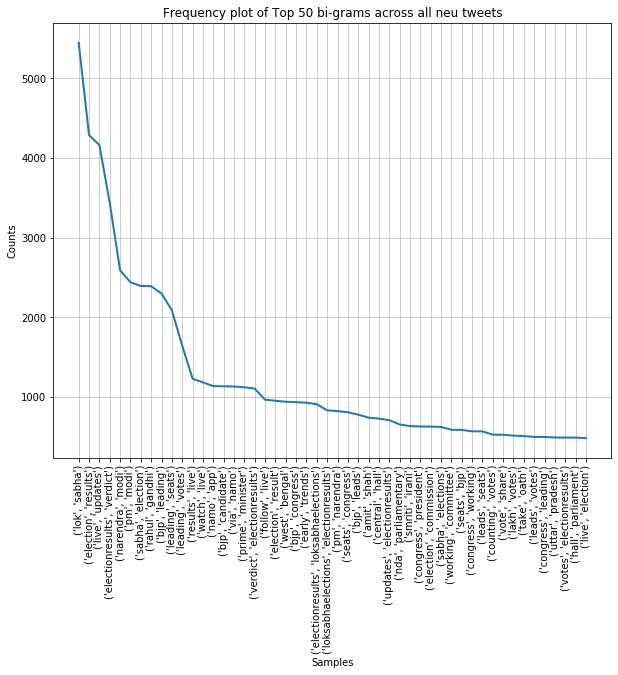

In [57]:
plt.rcParams['figure.figsize']=(10,8)
freq=FreqDist()


def f(arg):
    bigram_lst=(ngrams(arg['pros_text4'].split(),2))#a list of bigrams by pairing up adj tokens
    for e in bigram_lst:
        freq[e]=freq[e]+1#a kind of hashing to count frequency of particular bigram in entire corpus

    
d_neu.apply(f,axis=1)
plot_width =50
title='Frequency plot of Top 50 bi-grams across all neu tweets'
freq.plot(plot_width, title=title,cumulative=False)

#freq.savefig('all_bigrams.png', dpi=300)